In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class RetailAnalyzer:
    def __init__(self):
        self.df = None
        self.metrics = {}

    def load_data(self, file_path):
        try:
            self.df = pd.read_csv(file_path)
            if 'Date' in self.df.columns:
                self.df['Date'] = pd.to_datetime(self.df['Date'])
        except Exception as e:
            print(f"Error loading data: {e}")

    def calculate_metrics(self):
        if self.df is None:
            return "No data loaded."
        
        total_sales = self.df['Total Amount'].sum()
        avg_sales = self.df['Total Amount'].mean()
        most_popular_product = self.df['Product Category'].mode()[0]
        
        self.metrics = {
            'Total Sales': total_sales,
            'Average Sales': avg_sales,
            'Most Popular Product': most_popular_product,
            'Total Transactions': len(self.df)
        }
        return self.metrics

    def filter_data(self, column, value):
        if self.df is None: return None
        return self.df[self.df[column] == value]

    def display_summary(self):
        if not self.metrics:
            self.calculate_metrics()
        
        print("\n--- Retail Analysis Summary Report  ---")
        print(f"Total Transactions:   {self.metrics['Total Transactions']}")
        print(f"Total Sales Revenue:  {self.metrics['Total Sales']:,.2f}")
        print(f"Average Sale Value:   {self.metrics['Average Sales']:,.2f}")
        print(f"Top Product Category: {self.metrics['Most Popular Product']}")

analyzer = RetailAnalyzer()
analyzer.load_data('retail_sales_dataset.csv')
analyzer.display_summary()


--- Retail Analysis Summary Report  ---
Total Transactions:   1000
Total Sales Revenue:  456,000.00
Average Sale Value:   456.00
Top Product Category: Clothing


In [3]:
df = pd.read_csv('retail_sales_dataset.csv')

print(df.head())
print(df.info())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

In [4]:
df = pd.read_csv('retail_sales_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])

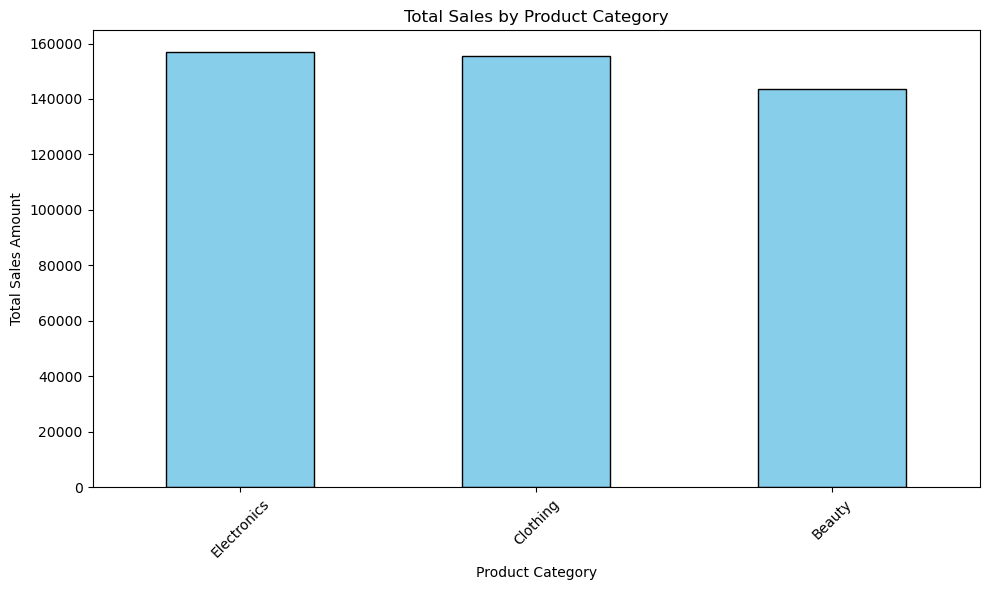

In [5]:
# 1. Bar Chart: Total sales by product category
plt.figure(figsize=(10, 6))
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

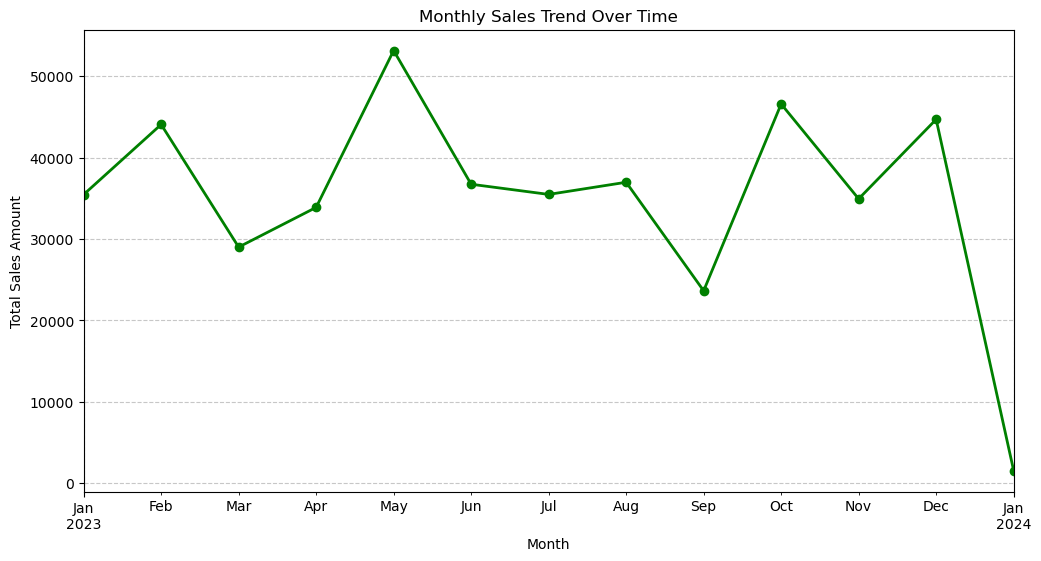

In [6]:
# 2. Line Graph: Sales trend over time (Monthly)
plt.figure(figsize=(12, 6))
df_monthly = df.set_index('Date').resample('ME')['Total Amount'].sum()
df_monthly.plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

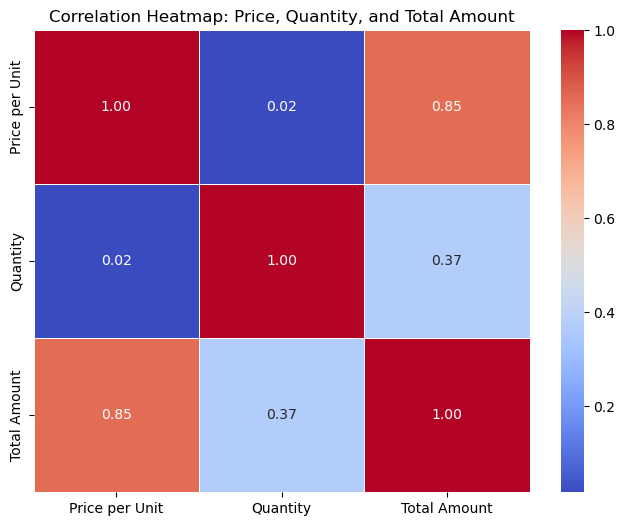

In [7]:
# 3. Heatmap: Correlation between product price and quantities sold
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Price per Unit', 'Quantity', 'Total Amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Price, Quantity, and Total Amount')
plt.show()